In [1]:
%load_ext autoreload

%autoreload 2

import tools as t
import readdata as rm
import predictive_model as m
import evaluate as e

from lentil import models
from lentil import evaluate
from lentil import datatools

import pandas as pd
import numpy as np
import pickle
import math

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Read Raw Data and Generate Features into 'processed_data.txt'

In [ ]:
rm.getTrainingInstances('raw_data/spanish_data.csv','spanish_processed.txt', 0, 2, 1, 3)

In [ ]:
rm.getTrainingInstances('raw_data/radical_transfer_2007.csv','radical_processed.txt', 0, 3, 2, 4)

In [ ]:
rm.getTrainingInstances('raw_data/chinese-hundredthousand.csv','chinese_processed.txt', 0, 3, 2, 4, 'pickles/history.pkl')

Convert processed data into Interaction History object

In [ ]:
spanish_history = t.textToInteractionHistory('spanish_processed.txt', 'timestamp', 'student_id','module_id','outcome', 'True')

t.savePickle(spanish_history, 'datasets/spanish.pkl')

In [ ]:
radical_history = t.textToInteractionHistory('radical_processed.txt', 'timestamp', 'student_id','module_id','outcome', 'True')

filtered_radical = t.filterHistory(radical_history.data)
t.savePickle(filtered_radical, 'datasets/radical.pkl')

In [ ]:
chinese_history = t.textToInteractionHistory('chinese_processed.txt', 'timestamp', 'student_id','module_id','outcome', 'True')

t.savePickle(chinese_history, 'datasets/chinese.pkl')

Load ready-to-go datasets from pickles

In [ ]:
spanish_history = t.loadPickle('datasets/spanish.pkl')

In [ ]:
radical_history = t.loadPickle('datasets/radical.pkl')

In [ ]:
chinese_history = t.loadPickle('datasets/chinese.pkl')

In [2]:
chinese_2007_history = t.loadPickle('datasets/chinese_2007.pkl')

In [ ]:
mnemosyne_history = t.loadPickle('datasets/mnemosyne.pkl')

In [ ]:
chinese_spring = t.loadPickle('datasets/chinese_spring.pkl')

In [ ]:
french_history = t.loadPickle('datasets/french.pkl')

Check properties of data

In [ ]:
t.getPropertiesOfData(spanish_history, 'SPANISH')

In [ ]:
t.getPropertiesOfData(radical_history, 'RADICAL')

In [ ]:
t.getPropertiesOfData(chinese_history, 'CHINESE 2006')

In [ ]:
t.getPropertiesOfData(chinese_2007_history, 'CHINESE 2007')

In [ ]:
t.getPropertiesOfData(mnemosyne_history, 'MNEMOSYNE')

In [ ]:
t.getPropertiesOfData(french_history, 'FRENCH')

Online Prediction Accuracy: Spanish, Radical and Chinese Datasets

Training population: 20%; Testing population: 80%

In [ ]:
#split history
train_chinese, test_chinese = t.splitHistory(chinese_history, 70)

In [ ]:
train_spanish, test_spanish = t.splitHistory(spanish_history, 70)

In [ ]:
train_radical, test_radical = t.splitHistory(radical_history, 70)

In [4]:
train_chinese_2007, test_chinese_2007 = t.splitHistory(chinese_2007_history, 70)

In [ ]:
train_mnemosyne, test_mnemosyne = t.splitHistory(mnemosyne_history, 70)

Set train and test datasets

In [6]:
total, train, test = chinese_2007_history, train_chinese_2007, test_chinese_2007

Train models

In [43]:
efc_model_1 = e.meta_train_efc_model(train.data, using_delay=True, strength_var = 'numreviews')

In [42]:
efc_model_2 = e.meta_train_efc_model(train.data, using_delay=True, strength_var = 'ml')

In [ ]:
onepl_model = e.train_onepl(train.data, train.data)

In [ ]:
random_model = e.train_random(train.data, train.data)

In [ ]:
percentage_model = e.train_percentage(train.data, train.data)

In [ ]:
logistic_model = e.train_logistic(train.data, train.data)

Evaluate EFC Models

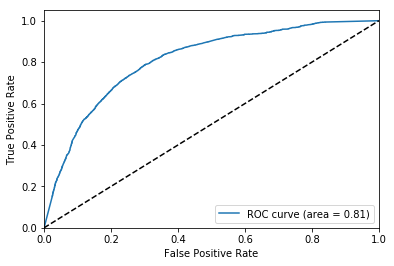

0.80936462765417172

In [45]:
evaluate.training_auc(efc_model_2, test, True)

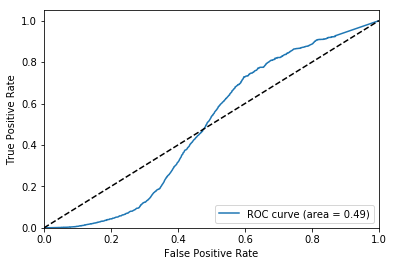

0.490089013790453

In [63]:
evaluate.training_auc(efc_model_1, test, True)

Evaluate Other Models

In [ ]:
evaluate.training_auc(logistic_model, test)

In [ ]:
perc_auc = evaluate.training_auc(percentage_model, test, True)
random_auc = evaluate.training_auc(random_model, test, True)

Generate Results

In [ ]:
results = e.getResults(total, 4, True)

Read Results

In [11]:
results = t.loadPickle('results/chinese_2007.pkl')

In [13]:
e.overallAccuracy(['EFC','LR','PERC','IRT'], results, 'AUC', 'Chinese 2007', False)